In [2]:
import pandas as pd

df = pd.read_csv('../dataIngestion/dataset.csv')
df['review_text'].fillna('', inplace=True)
df = df[~df['review_text'].str.contains('Early Access Review')]
df.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [3]:
df.shape

(5392351, 5)

# Number of games

In [4]:
num_games = df['app_name'].nunique()
print(num_games)

8561


# Distribution of number of reviews per game

In [5]:
app_name_counts = df['app_name'].value_counts()

# Convert the result to a DataFrame for better presentation
result_df = pd.DataFrame({'app_name': app_name_counts.index, 'review_counts': app_name_counts.values})
#result_df = app_name_counts.reset_index()

# Display the resulting DataFrame
print(result_df)
result_df.to_csv("./reviews_counts_per_game.csv")

                                               app_name  review_counts
0                                              PAYDAY 2          88973
1                                              Terraria          84828
2                                                Dota 2          73541
3                                         Rocket League          54227
4                                             Undertale          51918
...                                                 ...            ...
8556                                            CubeGun              1
8557                              Maszyny Rolnicze 2015              1
8558                                          Groggers!              1
8559                                         Star Fight              1
8560  Dark Parables: The Swan Princess and The Dire ...              1

[8561 rows x 2 columns]


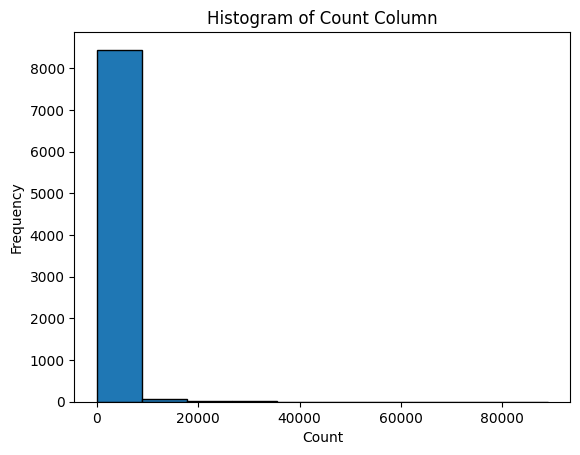

In [6]:
import matplotlib.pyplot as plt

plt.hist(result_df['review_counts'], bins=10, edgecolor='black')
plt.title('Histogram of Count Column')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

# Total number of reviews for a maximum N number of reviews to tag sentiment per game

Rather than running sentiment analysis on the whole dataset (estimated take ~2 days), pick a reasonable number N of reviews to predict per game and use the average of N reviews as the average sentiment per game.

In [7]:
def min_num_of_reviews(row, N):
    return min(N, row['review_counts'])

N = 100

result_df['min_review_counts'] = result_df.apply(lambda row: min_num_of_reviews(row, N), axis=1)
total_sum = result_df['min_review_counts'].sum()

print("Total number of reviews to tag sentiments: {}".format(total_sum))


Total number of reviews to tag sentiments: 495720
